## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')

## Section: Data Analysis
In this section, I'll conduct a comprehensive analysis of the dataset. We'll explore and visualize the data to gain insights and a better understanding of its characteristics.

### 1.1 Exploratory Data Analysis (EDA)
- **Data Loading:** Load the dataset into the notebook.
- **Data Inspection:** Examine the structure and content of the dataset.
- **Descriptive Statistics:** Calculate and analyze basic statistics to summarize key features.

### 1.2 Data Visualization

- **Distribution Plots:** Visualize the distribution of key variables.
- **Correlation Analysis:** Explore relationships between different features.

### 1.3 Key Findings

- **Summarize** the key findings from the data analysis.

---

---

In [2]:
df = pd.read_csv('engagement_2023_h1_plus.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."


In [3]:
# Dimension of the dataset
df.shape

(18332, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [5]:
# % of the missing values.
df.isnull().sum() / df.shape[0] * 100

Title                   0.000000
Available Globally?     0.000000
Release Date           73.385337
Hours Viewed            0.000000
Number of Ratings      22.419812
Rating                 22.419812
Genre                  14.024656
Key Words              30.171285
Description            42.073969
dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Viewed,18332.0,5.120205e+06,1.867122e+07,100000.0,200000.00,700000.0,3400000.0,812100000.0
Number of Ratings,14222.0,4.613511e+04,1.486087e+05,5.0,343.25,2594.0,19355.0,2829797.0
Rating,14222.0,6.509056e+00,1.227839e+00,1.2,5.80,6.6,7.3,10.0


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Title,18332,18214,Perfect Strangers // Známi neznámi,4
Available Globally?,18332,2,No,13798
Release Date,4879,1665,2020-03-20,16
Genre,15761,679,['Comedy'],1029
Key Words,12801,9687,"tv special,stand up comedy,stand up comedy spe...",79
Description,10619,8789,"Celebrate the enduring, powerful character of ...",62


## **Movies Available Globally**

Let's find out how many movies are accessible globally.

In [8]:
df['Available Globally?'].value_counts()

Available Globally?
No     13798
Yes     4534
Name: count, dtype: int64

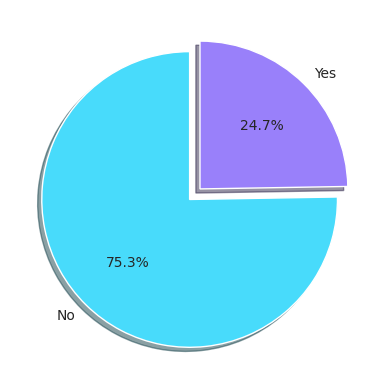

In [10]:
custom_colors = ['#48dbfb', '#9980FA']
plt.pie(df['Available Globally?'].value_counts()/df.shape[0],
        autopct='%1.1f%%', labels=df['Available Globally?']\
        .value_counts().index, colors=custom_colors, explode=[0.05, 0.05],
        shadow=True, startangle=90)
plt.show()

Here, we can see that a considerable number of movies are not globally accessible, and this can be attributed to factors such as regional licensing restrictions, content distribution agreements, and cultural sensitivities that influence availability in certain areas.

## **Ratings**

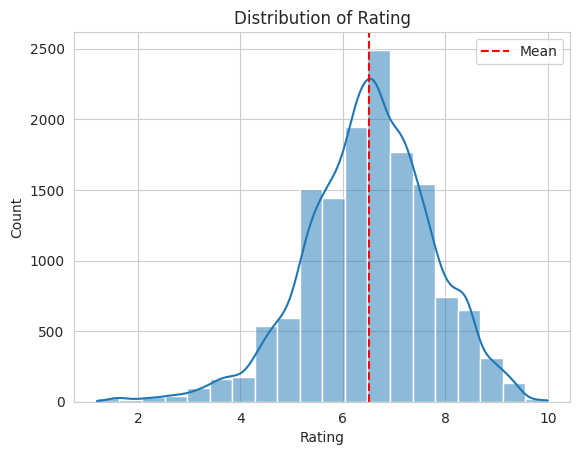

In [9]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.axvline(x=np.mean(df.Rating), color='r', label='Mean', linestyle='dashed')
plt.title('Distribution of Rating')
plt.legend()
plt.show()



The histogram of 'Rating' data shows a distribution that is not symmetrical but slightly skewed to the left, indicating that the ratings are on the lower side of the scale. The skewness of the data suggests that the mean might not be the best measure of central tendency for imputing missing values, especially since the mean is more influenced by outliers and extreme values.

Additionally, given that a considerable 22% of the data is missing, using the mean to fill in these gaps could artificially deflate the variability and potentially bias any subsequent analysis. The mean is a good choice when the data is normally distributed and the percentage of missing values is small; however, neither condition appears to be met in this case.

The median, on the other hand, is a better choice for skewed distributions

In [11]:
#Imputing missing  "Rating" values with the median
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

## **Ratings vs Hours Viewed**

In [12]:
fig = px.scatter(
    df, x='Number of Ratings',
    y='Hours Viewed', color='Rating',
    size='Rating', trendline='lowess',
    width=700
)

fig.show()



* The scatter plot visualizes the relationship between the number of ratings and hours viewed for a collection of content. The data is heavily concentrated at the lower end of the ratings scale, suggesting that most content has fewer ratings.

* Interestingly, there is a trend where content with fewer ratings has higher total viewership hours, indicated by a cluster of points with large 'Hours Viewed' values at the lower 'Number of Ratings' range. This could imply that less-rated content might have broad viewership but low viewer engagement in terms of leaving a rating.

* Outliers with exceptionally high viewership deviate from the general trend.

## **Movies with exceptionally high or low viewing hours.**

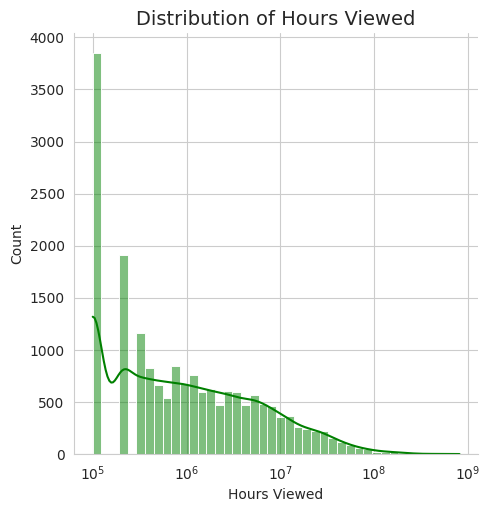

In [13]:
sns.displot(df['Hours Viewed'], log_scale=True, kde=True, color='green')
plt.title('Distribution of Hours Viewed', fontsize=14)
plt.show()

The high count in the first few bins suggests that most entities (which could be videos, channels, shows, etc.) have a relatively small number of hours viewed, with progressively fewer entities reaching higher hours viewed.


In [14]:
# Top 5 record based on Hours Viewed
top_5_hours_viewed = df.nlargest(5, 'Hours Viewed')
top_5_hours_viewed[['Title', 'Genre', 'Rating', 'Hours Viewed']]

,Title,Genre,Rating,Hours Viewed
0,The Night Agent: Season 1,"['Biography', 'Drama', 'History']",6.0,812100000
1,Ginny & Georgia: Season 2,"['Comedy', 'Drama', 'Romance']",5.7,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,['Short'],8.4,622800000
3,Wednesday: Season 1,['Talk-Show'],6.6,507700000
4,Queen Charlotte: A Bridgerton Story,"['Drama', 'History', 'Romance']",7.4,503000000


In [15]:
bottom_5_hours_viewed = df.nsmallest(5, 'Hours Viewed')
bottom_5_hours_viewed[['Title', 'Genre', 'Rating', 'Hours Viewed']]

,Title,Genre,Rating,Hours Viewed
14485,#Selfie (2014),NaN,6.6,100000
14486,10 Promises to My Dog // 犬と私の10の約束,"['Comedy', 'Drama', 'Romance']",6.9,100000
14487,10 Rules for Falling in Love // 10 regole per ...,['Comedy'],4.9,100000
14488,100% Coco,['Drama'],5.1,100000
14489,100% Coco New York,['Comedy'],5.6,100000


It appears that some movies with a substantial number of viewing hours receive poor ratings, while others with relatively fewer viewing hours attain similar ratings. This suggests that the movies might be widely watched due to their popularity, but their quality may not be commensurate with their high viewership, resulting in lower ratings.

## **Top-10 Best & Worst-Rated Movies**

In [16]:
top10 = df.nlargest(10, 'Rating')[['Title', 'Rating', 'Genre', 'Hours Viewed']]
fig = px.bar(top10, x='Title', y='Rating', color='Genre',
             hover_data='Hours Viewed', title='Top-Rated Movies',
             width=1000, height=700)
fig.show()

In [17]:
worst_rated = df.nsmallest(10, 'Rating')[['Title', 'Rating', 'Genre', 'Hours Viewed']]
fig = px.bar(worst_rated, x='Title', y='Rating',
             hover_data=['Hours Viewed'], color='Genre',
             title='Worst-Rated Movies', width=800)
fig.show()

## Correlation between different Numerical Columns

<Axes: >

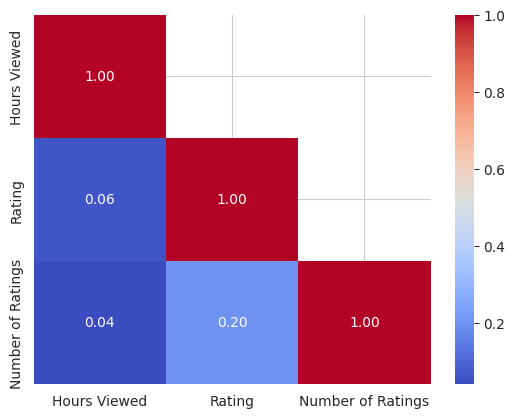

In [18]:
numeric_cols = ['Hours Viewed', 'Rating', 'Number of Ratings']
corr_matrix = df.loc[:, numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix), k=1)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=numeric_cols,
            yticklabels=numeric_cols,
            mask=mask)

## **Most Prevalent Genres**

In [19]:
top_genres = df.groupby('Genre').size().nlargest(10).reset_index(name='Count')
top_genres_hours_viewed = df[df['Genre'].isin(top_genres['Genre'])].groupby('Genre')['Hours Viewed'].sum().reset_index()

In [20]:
fig = px.bar(top_genres_hours_viewed, x='Hours Viewed', y='Genre', color='Genre',
             title='Total Hours Viewed for Top 10 Genres by Number of Entries', 
             width=1000)
fig.update_layout(showlegend=False)
fig.show()

Here, we can observe that short films tend to attract the most viewership, as people appreciate the time-saving aspect while still enjoying the entertainment provided.

## **Movies Released in the first half of 2023**

In [21]:
# Movies Released in 2023
df['Release Date'] = pd.to_datetime(df['Release Date'])
movies_in_2023 = df[df['Release Date'].dt.year == 2023]
movies_in_2023.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."
5,You: Season 4,Yes,2023-02-09,440600000,45624.0,6.6,"['Comedy', 'Romance']","christmas,coming out,holidays,lesbian relation...",A holiday romantic comedy that captures the ra...
7,Outer Banks: Season 3,Yes,2023-02-23,402500000,NaN,6.6,NaN,NaN,NaN


In [22]:
movies_in_2023.shape

(335, 9)

The dataset specifically covers the initial half of 2023, and within this timeframe, a noteworthy 335 movies have been released.

In [23]:
fig = px.scatter(movies_in_2023, x='Release Date', y='Rating', color_continuous_scale='oranges',
                 title='Ratings of Films Released in 2023', hover_data=['Title'], color='Title',
                 labels={'Rating': 'Rating', 'Release Date': 'Release Date'}, width=900)

fig.update_layout(
    showlegend=False
)

fig.show()

* The ratings are quite spread out, suggesting a variety of opinions on the films released.
* Most ratings seem to fall between 5 and 8, suggesting that most films are considered average to good.
* There are a few points at the very top and bottom, indicating some exceptional and poorly received films, respectively.

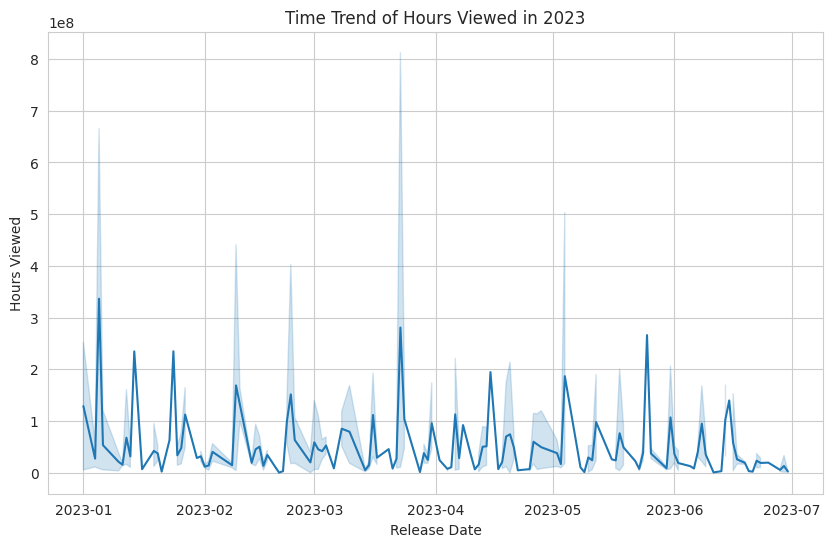

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Release Date', y='Hours Viewed', data=movies_in_2023)
plt.title('Time Trend of Hours Viewed in 2023')
plt.show()